<a href="https://colab.research.google.com/github/jhonda18/Python2/blob/main/N2_C2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p><img alt="Colaboratory logo" height="140px" src="https://upload.wikimedia.org/wikipedia/commons/archive/f/fb/20161010213812%21Escudo-UdeA.svg" align="left" hspace="10px" vspace="0px"></p>

<h1> <b>Técnicas computacionales en Python para Ciencias Económicas - Universidad de Antioquia </b> </h1>
<hr size=10 noshade color="green">
<p>
<img alt="CC BY-NC-SA logo" height="70px" src="https://lahormigonera.info/wp-content/uploads/2014/04/by-nc-sa-ccLicense.png" align="left" hspace="0px" vspace="0px">
</p>

<div align="right">  
Este documento está bajo licencia <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/deed.es">[CC BY-NC-SA]</a><br> 
<a href="mailto:sheryl.avendano@udea.edu.co"> ✉ Sheryl Avendaño </a> ,  <a href="mailto:sergio.sanes@udea.edu.co"> ✉ Sergio Sanes </a>, <a href="mailto: mario.sucerquia@udea.edu.co"> ✉ Mario Sucerquia </a><br>
Versión actualizada: 3-Ago-2020
</div>

<br>

**El presente curso hace parte de la Facultad de Ciencias Económicas (FCE) de la Universidad de Antioquia.**

El curso será dictado en 11 sesiones o clases de 3 horas los días martes y jueves por medio de Google meeting. Para un total de dedicación temporal de 32 horas. 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
import seaborn as sns

# **Pandas y la estadística descriptiva**

 La **estadística descriptiva** nos permite explorar los datos con el propósito de hallar las características principales, mediante la implementación de gráficas y el cálculo de algunas variable estadísticas. Para este fín, en Python, podemos hacer uso de:

 * Métodos: `.describe()`, el cual permite obtener un resumen estadístico de las **variables numéricas** en `pandas`, o la función `.value_counts()` la cual permite contabilizar variables categóricas o seleccionar las variables no numéricas y usar el mismos `.describe()`
 * Box plots e histogramas
 * Gráficos de dispersión. 
 * Heatmaps


In [ ]:
archivo = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(archivo)

In [ ]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [ ]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,197.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,53.766667,2555.666667,126.875622,3.330692,3.256904,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.099502,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,2.447822,517.296727,41.546834,0.268072,0.319256,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,0.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,0.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,0.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [ ]:
df.describe(include='object')

,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,200
unique,22,2,2,5,3,2,6,7,8,3
top,toyota,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,165,115,94,118,198,145,157,92,115


In [ ]:
df["drive-wheels"].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

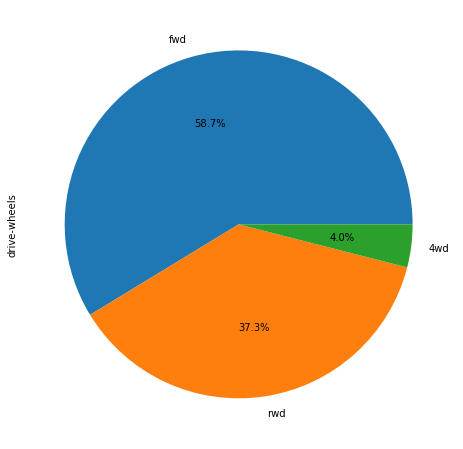

In [ ]:
df["drive-wheels"].value_counts().plot(kind = "pie", autopct='%1.1f%%', figsize=(8,8))

In [ ]:
df["width"].value_counts()

0.886111    24
0.923611    23
0.908333    15
0.950000    10
0.894444    10
0.888889     9
0.883333     9
0.909722     8
0.905556     7
0.933333     6
0.891667     6
0.920833     6
0.911111     6
0.929167     5
0.900000     4
0.956944     4
0.943056     4
0.912500     4
0.902778     3
0.995833     3
0.887500     3
0.991667     3
0.976389     3
0.897222     2
0.940278     2
0.966667     2
0.890278     2
0.918056     2
0.948611     2
0.944444     1
0.868056     1
0.916667     1
0.979167     1
0.880556     1
0.919444     1
0.858333     1
0.955556     1
0.980556     1
0.837500     1
0.922222     1
0.984722     1
0.925000     1
1.000000     1
Name: width, dtype: int64

## Box Plots e Histogramas


Los box plot representan gráficas en las que se pueden analizar varias características de un conjunto de datos como:

<ol>
    <li> La distribución de los datos.</li>
    <li> Asimetría.</li>
    <li> Los puntos aislados.</li>
</ol>

En la siguiente gráfica se muestran las diferentes partes de una gráfica de caja:

<img src="https://i.ibb.co/6tkRtg0/Captura-de-pantalla-2019-08-22-19-01-17.png" style="width:250px;height:300px;" alt="Captura-de-pantalla-2019-08-20-22-39-39" border="0">

En esta gráfica, podemos identificar las siguiente cantidades:

<ol>
    <li> Mediana.</li><br>
    <li> Cuartil superior $P_{75}.$</li><br>
    <li> Cuartil inferior $P_{25}$</li><br>
    <li>Rango intercuartil $IQR=P_{75}-P_{25}$</li><br>
    <li>Extremo superior UE= \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}<br> </li><br>
    <li>Extremo inferior LE= \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}<br></li>
</ol>

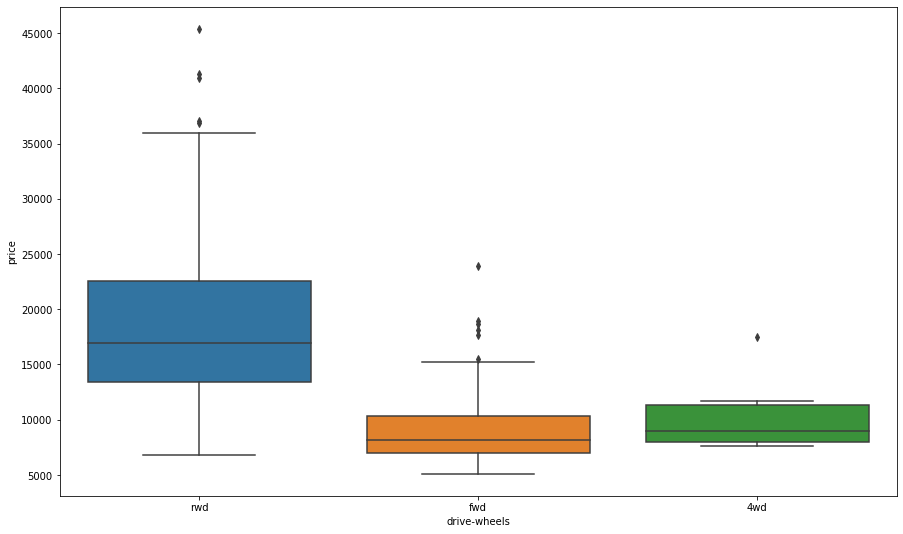

In [ ]:
plt.figure(figsize=(15,9))
sns.boxplot(x="drive-wheels",y="price", data=df)
plt.show()

En este caso se tiene que:

1 Mediana: rwd $\rightarrow$ 16900, fwd $\rightarrow$ 8192 y 4wd$\rightarrow$9005.5


In [ ]:
df.groupby('drive-wheels').median()["price"]

drive-wheels
4wd     9005.5
fwd     8192.0
rwd    16900.0
Name: price, dtype: float64

2. Cuartil superior: $P_{75\text{-rwd}}\approx 22547.50$, $P_{75\text{-fwd}}\approx 10333$ y $P_{75\text{-4wd}}\approx 11368$

In [ ]:
q3 = df.groupby('drive-wheels').quantile(q=0.75)["price"]
q3

drive-wheels
4wd    11367.75
fwd    10332.50
rwd    22547.50
Name: price, dtype: float64

3. Cuartil inferior: $P_{25\text{-rwd}}= 13455$, $P_{25\text{-fwd}}\approx 6951$ y $P_{25\text{-4wd}}\approx 7984$

In [ ]:
q1 = df.groupby('drive-wheels').quantile(q=0.25)["price"]
q1

drive-wheels
4wd     7984.25
fwd     6950.75
rwd    13455.00
Name: price, dtype: float64

4. Rango intercuartil: $IQR_{\text{rwd}}\approx 9093$, $IQR_{\text{fwd}}\approx 3381$ y $IQR_{\text{4wd}}\approx 3384$

In [ ]:
iqr = q3 - q1
iqr

drive-wheels
4wd    3383.50
fwd    3381.75
rwd    9092.50
Name: price, dtype: float64

<hr size=15 noshade color="#F19CBB">

**EJERCICIO 1**


5. Extremo superior \begin{cases} 
   P_{\text{75}}+1.5\times IQR = UP & \text{si } UP < \text{max(Data)} \\
   \text{max(Data)}       & \text{si } UP \ge \text{max(Data)}
  \end{cases}


6. Extremo inferior \begin{cases} 
   P_{\text{25}}-1.5\times IQR = LO & \text{si } LO > \text{min(Data)} \\
   \text{min(Data)}       & \text{si } LO \le \text{min(Data)}
  \end{cases}

<hr size=15 noshade color="#F19CBB">

Los box plots, o diagramas de cajas permiten comparar facilmente diferentes grupos. En este ejemplo, mediante el uso de diagramas de cajas podemos ver diferentes categorías y sus distribuciones respecto al precio. Usemos el diagrama de cajas para determinar si la variable "body-style" y "engine-location", la cual determina el tipo de carro, es un buen predictor del precio. 



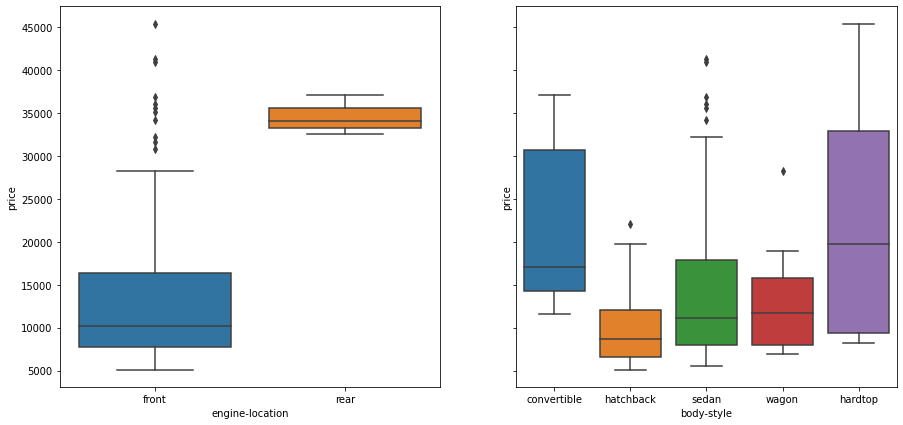

In [ ]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,7))

sns.boxplot(x="engine-location",y="price", data=df, ax=ax[0])
sns.boxplot(x="body-style", y="price", data=df, ax= ax[1])

* Figura 1: Puede observarse qu la distribución de los precios entre las subcategorias fron y rear son lo suficiente diferentes como para considerar la variable categórica "engine-location" como un predictor adecuado del precio.

* Figura 2: Se puede observar que el precio de los carros para los diferentes tipos de carros presenta una superposición significativa, de tal forma que la variable "body-style" no sería un predictor adecuado del precio




In [ ]:
def hist_sea(y,bins=20):
  plt.figure(figsize=(15,5))
  ax = plt.subplot(1,1,1)
  ax.set_title('Histograma')
  sns.distplot(y,bins=bins, hist = True, ax=ax)
  ax.set_xlabel('Variable')
  return ax

def hist_mat(y,bins=20):
  plt.figure(figsize=(15,5))
  ax = plt.subplot(1,1,1)
  ax.set_title('Histograma')
  ax.hist(y,bins=20,density=True)
  ax.set_xlabel('Variable')
  return ax

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


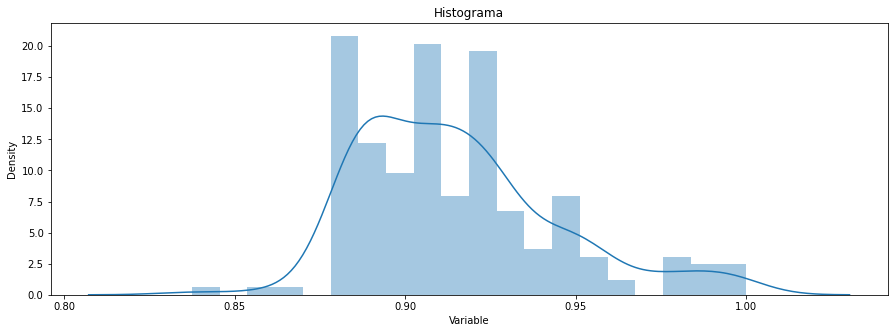

In [ ]:
ax = hist_sea(df["width"])
plt.show()

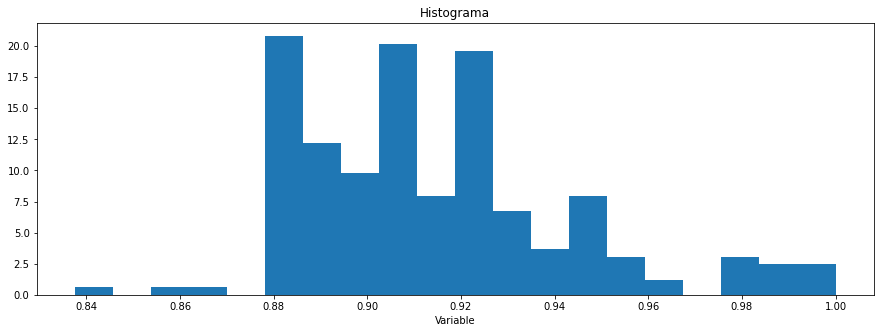

In [ ]:
ax = hist_mat(df["width"])
plt.show()

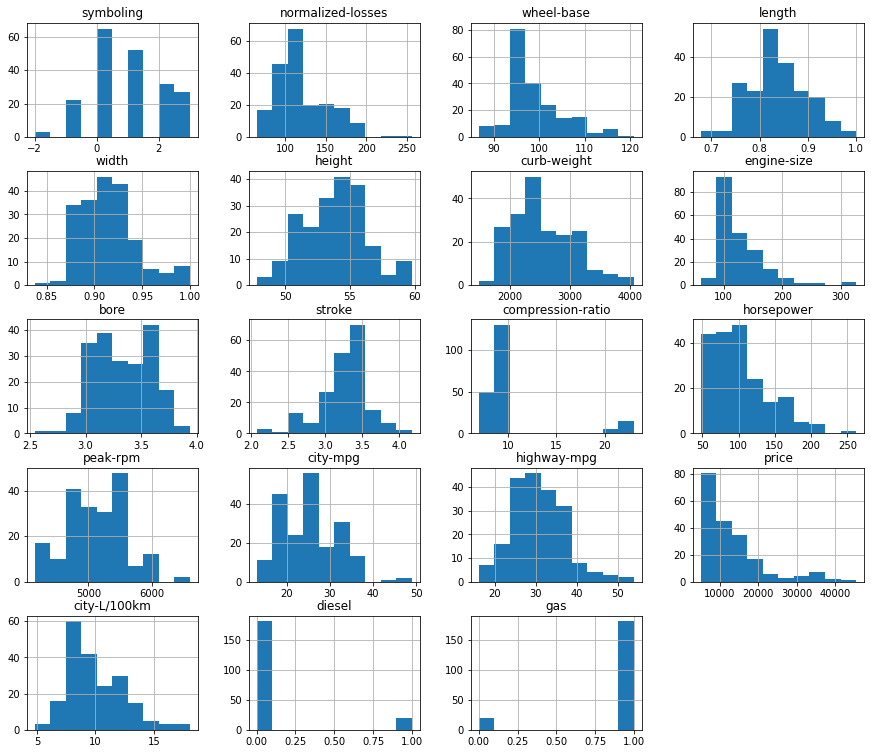

In [ ]:
df.hist(figsize=(15,13))
plt.show()

In [ ]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f597b226e80>,
      dtype=object)

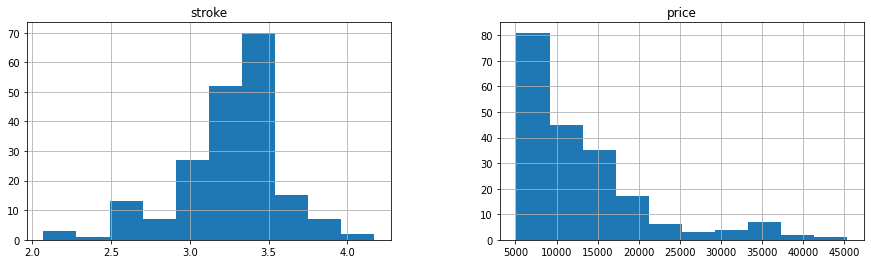

In [ ]:
df.hist(column=['stroke','price'], figsize=(15,4))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


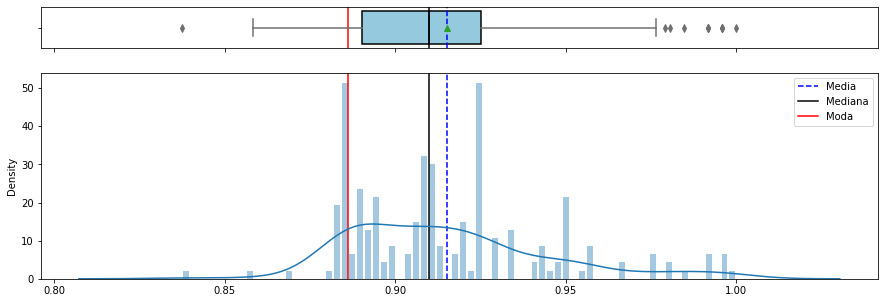

In [ ]:
from scipy import stats
def central_measures(data):
  #data ---> arreglo de numpy
  #shape #filas, #columnas #share #gridspec_kw --> cambiar relaciones de ancho y alto
  f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (0.2, 1)},figsize=(15,5))

  #Crear las líneas verticales
  [axi.axvline(data.mean(),color='b',ls='--',label='Media') for axi in ax]
  [axi.axvline(np.median(data),color='k',label='Mediana') for axi in ax]
  [axi.axvline(stats.mode(data).mode[0],color='r',label='Moda') for axi in ax]
  
  #Para hacer la caja y bigotes
  sns.boxplot(data, ax=ax[0],color='skyblue',medianprops={'color':'black'},showmeans=True)
  
  #Para quitar los bordes
  [a.set_edgecolor('black')for a in ax[0].artists]
  ax[0].set(xlabel='')

  #Grafico el histograma con la pdf
  sns.distplot(data,bins=70, hist_kws={"rwidth":0.75},hist = True,ax=ax[1])
  ax[1].legend()
  plt.show()


columna = 'width' 
central_measures(df[columna].values)

In [ ]:
#!pip list | grep seaborn
#!pip list 

[Nueva función](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

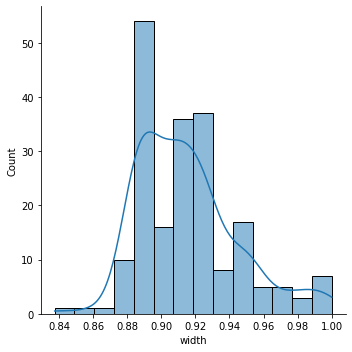

In [ ]:
sns.displot(df['width'], kind='hist', kde=True)

## Scatter plots

Dentro de nuestros datos podemos tener en varias ocasiones variables continuas. Este tipo de datos representan puntos dentro de un rango. En el conjunto de datos que estamos trabajando, por ejemplo, las variables correspondientes a las columnas **"price"** y **"engine-size"** son variables continuas. ¿Qué deberiamos hacer si queremos predecir o realcionar el precio a partir del tamaño del motor?.

Una forma rápida para inspeccionar este tipo de relaciones consiste en realizar un scatter plot de ambas variables. Cada observación en el scatter plot es representada  como un punto. Este tipo de gráficas representa la relación ente ambas variables. La variable predictora representa la variable que se usa para predecir un determinado resultado. Por otra parte, la variable diana o blanco, corresponde a la variable que se pretende predecir. En nuestro caso tenemos que:

<ol>
    <li>Variable diana o blanco: "price".</li>
    <li>Variable predictora: "engine-size".</li>
</ol>

En una gráfica de dispersión, usualmente el eje x, o eje horizontal, se hace coincidir con la variable predictora y el eje y, o eje vertical, con la variable diana.

Veamos ahora como se relacionan las variables "price" y "engine-size".

In [ ]:
df.select_dtypes(exclude='object').columns

Index(['symboling', 'normalized-losses', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-size', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'city-L/100km', 'diesel', 'gas'],
      dtype='object')

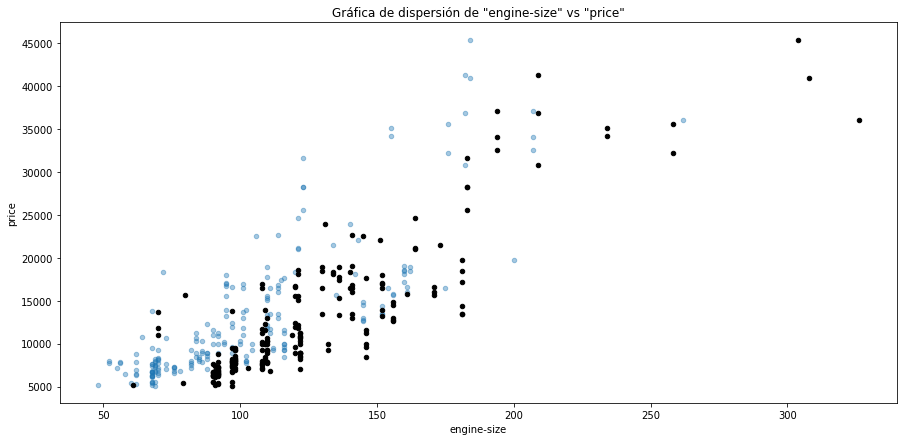

In [ ]:
ax = df.plot(kind="scatter", y = "price", x = 'horsepower', 
             title = "Gráfica de dispersión de \"engine-size\" vs \"price\"", alpha = 0.4, figsize=(15,7))
df.plot(kind="scatter", y = "price", x = 'engine-size', 
        title = "Gráfica de dispersión de \"engine-size\" vs \"price\"",  figsize=(15,7),ax = ax, color="k")
#ax.set_xlim(right=200)

[  172.18312191 -4597.55829789] [4.35256342e+09]


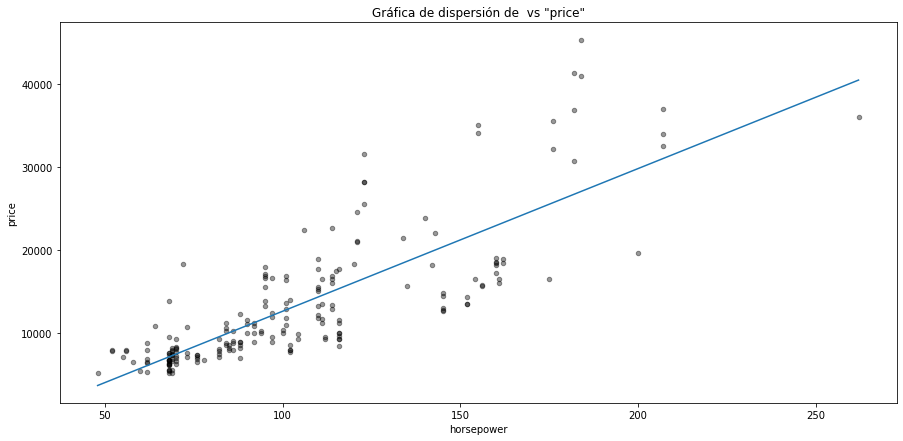

In [ ]:
col = 'horsepower'
X = df[col]
C , res, rank, s_values, rcond= np.polyfit(X,df["price"],1,full=True)
p_fit = np.poly1d(C)

ax=df.plot(kind="scatter", y = "price", x = col, title = "Gráfica de dispersión de  vs \"price\"",  figsize=(15,7), color="k", alpha=0.4)
X = np.linspace(df[col].min(),df[col].max(),100)
Y_pred = p_fit(X)
ax.plot(X,Y_pred)
print(C,res)

In [ ]:
coef_corr = pd.concat([df.corr()['price'],df.corr(method='kendall')['price'],df.corr(method='spearman')['price']],
                      keys=['pearson','kendall','spearman'],axis=1)

coef_corr.sort_values(by='kendall')

,pearson,kendall,spearman
city-mpg,-0.686571,-0.661282,-0.831284
highway-mpg,-0.704692,-0.651805,-0.827265
compression-ratio,0.071107,-0.136957,-0.177579
gas,-0.110326,-0.118449,-0.144657
symboling,-0.082391,-0.104866,-0.142683
peak-rpm,-0.101616,-0.048705,-0.081912
stroke,0.082310,0.094153,0.117582
diesel,0.110326,0.118449,0.144657
normalized-losses,0.133999,0.134911,0.202034
height,0.135486,0.182387,0.263806


<hr size=15 noshade color="#F19CBB">

**EJERCICIO 2**


Variar la variable predictora, por lo menos 3 opciones y compare.  

<hr size=15 noshade color="#F19CBB">

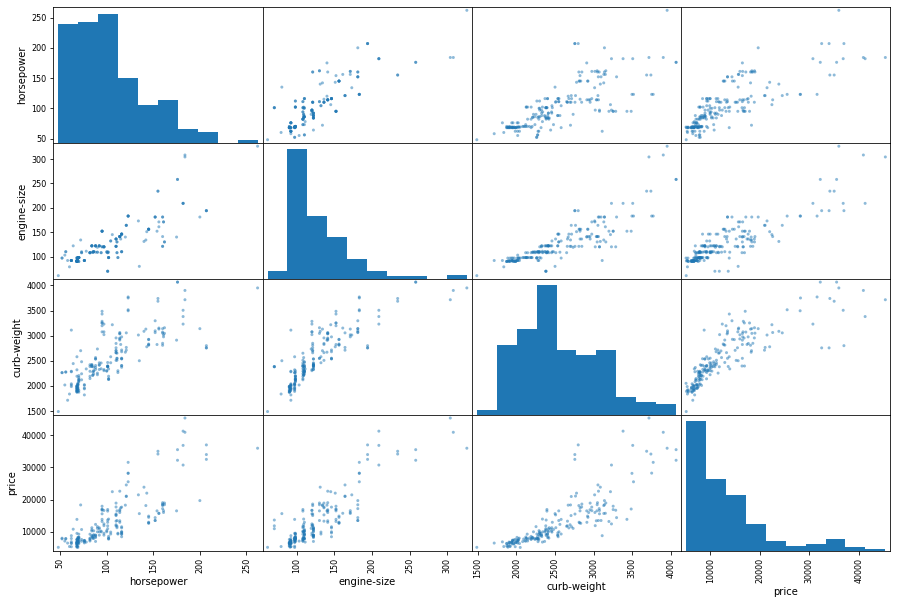

In [ ]:
from pandas.plotting import scatter_matrix

scatter_matrix(df[['horsepower','engine-size','curb-weight','price']], figsize=(15,10))
plt.show()

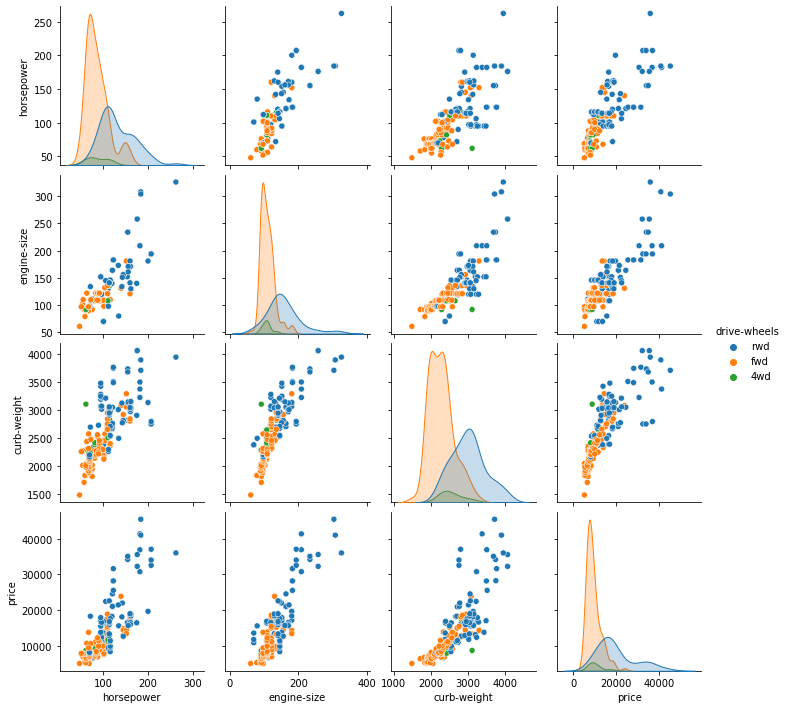

In [ ]:
sns.pairplot(df, vars=['horsepower','engine-size','curb-weight','price'], hue="drive-wheels")

## Groupby y Heatmaps

Recordemos que con el método groupby podemos agrupar los datos en diferentes categorías. Los datos son agrupados con base en una o varias características y el análisis se realiza sobre los grupos individuales. Veamos esto.

Agrupemos, por ejemplo la tabla por tipo de tracción ("drive-wheels"). Podemos observar que tenemos tres tipos de categorias.

In [ ]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

Definamos un subdataFrame con las columnas 'drive-wheels', 'body-style' y 'price' y agrupemos por 'drive-wheels' para calcular el valor medio en cada categoria:

In [ ]:
df_group = df[['drive-wheels','body-style','price']]

# Agrupamiento de los resultados
df_grupo1 = df_group.groupby(['drive-wheels'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
df_grupo1

,drive-wheels,price
0,rwd,19757.613333
1,4wd,10241.000000
2,fwd,9244.779661


In [ ]:
df.groupby(['drive-wheels']).price.describe()

,count,mean,std,min,25%,50%,75%,max
drive-wheels,,,,,,,,
4wd,8.0,10241.000000,3288.211064,7603.0,7984.25,9005.5,11367.75,17450.0
fwd,118.0,9244.779661,3345.898257,5118.0,6950.75,8192.0,10332.50,23875.0
rwd,75.0,19757.613333,9082.575728,6785.0,13455.00,16900.0,22547.50,45400.0


De los datos, se puede ver que los carros con tracción tracera son, en promedio, los mas caros. Por otra parte, los carros de tracción delantera y tracción total son, en promedio, similares. 

Podemos agrupar de acuerdo a varias variables. Por ejemplo, agrupemos por 'drive-wheels' y 'body-style'. Este procedimento agrupara el dataframe por combinaciones unicas de 'drive-wheels' y 'body-style'. Guardemos el resultado en la variable de prueba 'grupo_test'

In [ ]:
# grouping results
grupo_test = df_group.groupby(['drive-wheels','body-style'], as_index = False).mean().sort_values(by = "price", ascending = False).reset_index(drop = True)
grupo_test

,drive-wheels,body-style,price
0,rwd,hardtop,24202.714286
1,rwd,convertible,23949.600000
2,rwd,sedan,21711.833333
3,rwd,wagon,16994.222222
4,rwd,hatchback,14337.777778
5,4wd,sedan,12647.333333
6,fwd,convertible,11595.000000
7,fwd,wagon,9997.333333
8,fwd,sedan,9811.800000
9,4wd,wagon,9095.750000


Este tipo de tablas es más facil visualizarlas cuando se convierten en una tabla pivote. Como en Excel, en las tablas pivote podemos visualizar los datos especificando una variable categórica a lo largo de las columnas y otra variable categórica a lo largo de las filas.

En este caso, la categoria "drive-wheel" le asignaremos las filas de la tabla, y realizacemos un pivote en "body-style" para convertirla en las columnas de la tabla:

In [ ]:
grouped_pivot = grupo_test.pivot(index = 'drive-wheels', columns = 'body-style')
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  NaN           NaN  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

En muchas ocaciones, tenemos valores nulos para algunas celdas de la tabla. Podemos rellenar estos casos con un valor 0.

---



In [ ]:
grouped_pivot = grouped_pivot.fillna(0) #fill missing values with 0
grouped_pivot

price                ...                            
body-style   convertible       hardtop  ...         sedan         wagon
drive-wheels                            ...                            
4wd                  0.0      0.000000  ...  12647.333333   9095.750000
fwd              11595.0   8249.000000  ...   9811.800000   9997.333333
rwd              23949.6  24202.714286  ...  21711.833333  16994.222222

[3 rows x 5 columns]

El uso de heatmaps nos permite visualizar el comportamiento del precio en función de dos variables. Por ejemplo, pordemos visualizar la tabla pivote anterior como una imagen de píxeles con el color correspondiente al valor del precio. De esta forma, podemos ver, por ejemplo, como se relaciona el precio con el tipo de tracción y el tipo de carro:

In [ ]:
#labels
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

row_labels,col_labels

(Index(['convertible', 'hardtop', 'hatchback', 'sedan', 'wagon'], dtype='object', name='body-style'),
 Index(['4wd', 'fwd', 'rwd'], dtype='object', name='drive-wheels'))

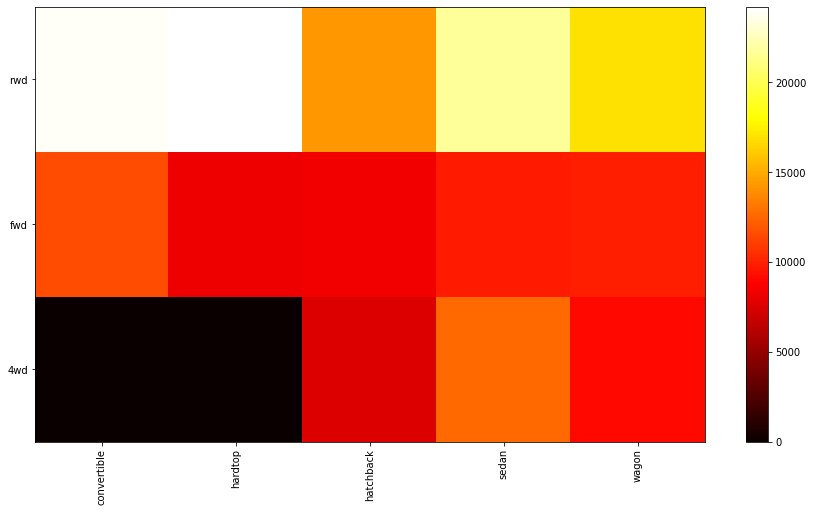

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
im = ax.pcolor(grouped_pivot, cmap='hot')

#move ticks to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate the labels
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

# **Introducción a Scikit-Learn**




In [ ]:
X = np.random.random(size=(10,2))
mask = np.random.choice([1, 0], X.shape, p=[.3, .7]).astype(bool)
X[mask] = np.nan

In [ ]:
X

array([[0.6703442 , 0.29045702],
       [0.60882947, 0.05342989],
       [0.07897312,        nan],
       [       nan, 0.45696426],
       [       nan,        nan],
       [       nan,        nan],
       [0.63763479, 0.51665881],
       [0.92422261, 0.05911659],
       [       nan, 0.33693898],
       [0.95375832,        nan]])



## Generalidades

Hay varias bibliotecas de Python que proporcionan implementaciones sólidas de una variedad de algoritmos de ML. Uno de los más conocidos es [Scikit-Learn](https://scikit-learn.org/stable/), un paquete que proporciona versiones eficientes de una gran cantidad de algoritmos comunes. Scikit-Learn se caracteriza por ser una API limpia, uniforme y optimizada, así como por una documentación en línea muy útil y completa. La API de Scikit-Learn está notablemente bien diseñada. Los principales principios de diseño son:

* **Estimadores**: Cualquier objeto que pueda estimar algunos parámetros basados en un conjunto de datos se llama *estimador*. La estimación en sí misma se realiza mediante el método `fit()`, y solo toma un conjunto de datos como parámetro (o dos para algoritmos de aprendizaje supervisados; el segundo conjunto de datos contiene las etiquetas). Cualquier otro parámetro necesario para guiar el proceso de estimación se considera un hiperparámetro. Ya habíamos visto un ejemplo de un estimador cuando realizamos el llenado de valores nulos con `SimpleImputer` (La estrategía de llenado, en este caso "most frequent", es un ejemplo de un hiperparámetro)


In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='most_frequent', verbose=0)

* **Transformadores**: Algunos estimadores (como el imputer) también pueden transformar un conjunto de datos; Estos se llaman transformadores. Una vez más, la API es bastante simple: la transformación se realiza mediante el método `transform()` con el conjunto de datos para transformar como parámetro. Los transformadores también tienen un método conveniente llamado `fit_transform()` que es equivalente a llamar a `fit()` y luego aplicar `transform()`

In [ ]:
imp = SimpleImputer(strategy='most_frequent')
transformed_data = pd.DataFrame(imp.fit_transform(X))

In [ ]:
transformed_data

,0,1
0,0.670344,0.290457
1,0.608829,0.053430
2,0.078973,0.053430
3,0.078973,0.456964
4,0.078973,0.053430
5,0.078973,0.053430
6,0.637635,0.516659
7,0.924223,0.059117
8,0.078973,0.336939
9,0.953758,0.053430


* **Predictores**: Finalmente, algunos estimadores son capaces de hacer predicciones dado un conjunto de datos; Estos se conocen como predictores. Un predictor tiene un método `predict()` que toma un conjunto de datos de nuevas instancias y devuelve un conjunto de datos de predicciones correspondientes. También tiene un método `score()` que mide la calidad de las predicciones dado un conjunto de prueba. (El modelo `LinearRegression` que veremos más adelante es un ejemplo de un predictor)




## Tratamiento de datos

Un entrenamiento se trata de crear modelos a partir de datos. Entrenar cualquier modelo requiere de algunos pasos intermedios.

In [ ]:
import pandas as pd

df=pd.read_csv('https://raw.githubusercontent.com/diplomado-bigdata-machinelearning-udea/Curso1/master/s04/adult.csv') 
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native-country,class
0,2,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,1,0,2,United-States,<=50K
1,3,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,0,United-States,<=50K
2,2,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,2,United-States,<=50K
3,3,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,2,United-States,<=50K
4,1,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,2,Cuba,<=50K



###  Datos de entrenamiento y de prueba

Comencemos por crear la matrix de características **X** y el vector (serie) de etiquetas **y**. Supongamos que en este caso queremos predecir la característica "age":

In [ ]:
len(df.columns)

15

In [ ]:
X = df.drop("age", axis=1)
X.shape

(48842, 14)

In [ ]:
y = df["age"]
y.shape

(48842,)




Generalmente se elige el 20% de los datos para la prueba y el resto para el entrenamiento. Los datos se deben dividir eligiendo los datos de manera aleatoria. Existen varias maneras de realizar este proceso

   1) Crear una función que seleccione el 20% de los datos aleatoriamente.
      
   2) De la librería `sklearn.model_selection` usar las funciones:
      
      * train_test_split
       
      * StratifiedShuffleSplit 
      
La primera función dividirá los datos en los mismos índices (esto es muy útil, por ejemplo, si tenemos un DataFrame separado para las etiquetas). La segunda función hace lo que se conoce como un muestreo estratificado, el cual se usa en el caso de que no haya suficientes datos y queramos evitar introducir sesgos




In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Cuando tengamos una cantidad de datos tal que estemos seguros que no introduciremos un sesgo
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42) # random_state nos permite establecer una semilla 

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(39073, 14) (39073,)
(9769, 14) (9769,)


In [ ]:
len(X)*0.8+len(X)*0.2

48842.0

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

s = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=40)
k=0
for train_index, test_index in s.split(X,y):
  k+=1
  print(k)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  Y_train, Y_test = y.iloc[train_index], y.iloc[test_index]
  
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

1
2
3
4
5
(39073, 14) (39073,)
(9769, 14) (9769,)


###  Conversión de variables categóricas

Para la conversión de variables categóricas, sklearn ofrece los módulos `OrdinalEncoder` y `OneHotEncoder`

In [ ]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capitalgain        int64
capitalloss        int64
hoursperweek       int64
native-country    object
class             object
dtype: object

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ordinal_encoder = OrdinalEncoder()
df_cat_encoded = ordinal_encoder.fit_transform(df[["education"]])


cat_encoder = OneHotEncoder()
cat_encoder.fit(df[["sex"]])
df_cat_1hot = cat_encoder.transform(df[["sex"]])


In [ ]:
df_cat_encoded

array([[ 9.],
       [ 9.],
       [11.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [ ]:
df_cat_1hot[:5]

<5x2 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

Por defecto el `OneHotEncoder` retorna una matriz dispersa (sparse). Muchos de los estimadores de Sklearn aceptan entradas de este tipo al ajustar y evaluar modelos. 


### Escalado de características

Muchos algoritmos no funcionan bien cuando los atributos numéricos de entrada tienen escalas muy diferentes (o en algunos casos las entradas deben estar normalizadas). Para resolver esto, Scikit-Learn tiene dos funciones para que todos los atributos tengan la misma escala: 

* Normalización  $$
           x'=\frac{x-x_{min}}{x_{max}-x_{min}}.
           $$ 




In [ ]:
df['age'].describe()

count    48842.000000
mean         1.771078
std          1.295378
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: age, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[0.5 ],
       [0.75],
       [0.5 ],
       ...,
       [0.5 ],
       [0.5 ],
       [0.25]])

In [ ]:
pd.Series(scaler.fit_transform(df["age"].values.reshape((-1,1))).reshape((-1))).describe()

count    48842.000000
mean         0.442770
std          0.323845
min          0.000000
25%          0.250000
50%          0.500000
75%          0.750000
max          1.000000
dtype: float64

* Estandarización:$$
    x'=\frac{x-\bar x}{\sigma}
    $$

In [ ]:
from sklearn.preprocessing import StandardScaler

sscaler = StandardScaler()
sscaler.fit_transform(df[["age"]],df[["hoursperweek"]])

array([[ 0.17672381],
       [ 0.94870704],
       [ 0.17672381],
       ...,
       [ 0.17672381],
       [ 0.17672381],
       [-0.59525942]])

In [ ]:
pd.Series(sscaler.fit_transform(df["age"].values.reshape((-1,1))).reshape((-1))).describe()

count    4.884200e+04
mean    -1.553935e-15
std      1.000010e+00
min     -1.367243e+00
25%     -5.952594e-01
50%      1.767238e-01
75%      9.487070e-01
max      1.720690e+00
dtype: float64


### Pipeline

Un *Pipeline* es una secuencia de transformaciones que se utilizan para automatizar flujos de trabajo. Los pipelines son muy comunes en los sistemas de ML, ya que hay muchos datos para manipular y muchas transformaciones de datos para aplicar. Sklearn proporciona la clase `Pipeline`. En el siguiente ejemplo crearemos un pipeline para 

1) Reemplazar los valores nulos por la media 

2) Estandarizar los datos.


In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [ ]:
df_age_pipe = num_pipeline.fit_transform(df[["age"]])

In [ ]:
trans_age = pd.DataFrame(df_age_pipe)
trans_age

,0
0,0.176724
1,0.948707
2,0.176724
3,0.948707
4,-0.595259
...,...
48837,0.176724
48838,1.720690
48839,0.176724
48840,0.176724


In [ ]:
trans_age.std()

0    1.00001
dtype: float64

In [ ]:
trans_age.mean()

0   -1.553935e-15
dtype: float64